In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">딥러닝</font>

## 1. 기존의 프로그램 방식


In [6]:
# 섭씨 온도를 화씨 온도로 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [7]:
input_c = int(input('섭씨온도'))
print('화씨온도', celsius_to_faherenheit(input_c))

섭씨온도45
화씨온도 113.0


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 스케일 조정, 훈련데이터(학습데이터 셋), 검증용데이터셋, 시험데이터셋으로 분할
3. 모델구성
4. 모델 학습과정 서렁
5. 모델 학습시키기
6. 모델 평가
7. 모델 사용
```
## 2.1 노이즈가 없는 데이터 추출


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data_c = np.arange(100)
data_c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
data_f = celsius_to_faherenheit(data_c)
data_f

array([ 89.6 ,  92.84,  96.08,  99.32, 102.56, 105.8 , 109.04, 112.28,
       115.52, 118.76, 122.  , 125.24, 128.48, 131.72, 134.96, 138.2 ,
       141.44, 144.68, 147.92, 151.16, 154.4 , 157.64, 160.88, 164.12,
       167.36, 170.6 , 173.84, 177.08, 180.32, 183.56, 186.8 , 190.04,
       193.28, 196.52, 199.76, 203.  , 206.24, 209.48, 212.72, 215.96,
       219.2 , 222.44, 225.68, 228.92, 232.16, 235.4 , 238.64, 241.88,
       245.12, 248.36, 251.6 , 254.84, 258.08, 261.32, 264.56, 267.8 ,
       271.04, 274.28, 277.52, 280.76, 284.  , 287.24, 290.48, 293.72,
       296.96, 300.2 , 303.44, 306.68, 309.92, 313.16, 316.4 , 319.64,
       322.88, 326.12, 329.36, 332.6 , 335.84, 339.08, 342.32, 345.56,
       348.8 , 352.04, 355.28, 358.52, 361.76, 365.  , 368.24, 371.48,
       374.72, 377.96, 381.2 , 384.44, 387.68, 390.92, 394.16, 397.4 ,
       400.64, 403.88, 407.12, 410.36])

In [14]:
# 2.데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정 
scaled_data_c = data_c/100.0
scaled_data_f = data_c/100.0
print(scaled_data_c)
print(scaled_data_f)

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76  1.778 1.796 1.814
 1.832 1.85  1.868 1.886 1.904 1.922 1.94  1.958 1.976 1.994 2.012 2.03
 2.048 2.066 2.084 2.102]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.4

In [16]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [21]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
#model.add(Input(shape=(1, )))
#model.add(Dense(1))
model.add(Dense(units=1,
                input_shape=(1,),))      # 입력변수의 shape                     # 타겟 변수의 갯수

In [22]:
#4 모델 학습과정 설정
model.compile(loss='mse',   # 손실함수 - 모델 학습 중오차를 최소화하기 위해 사용
             optimizer='rmsprop',  # 옵티마이져
             metrics=['mae']) # 평가지표
# mse : 오체제곱의 평균(이상치 반영)
# mae : 오차 절대값의 경군(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 학습전 예측 
model.predict(np.array([[0],[0.01]]))     # 섭씨온도 0,1도는 화씨온도 몇도?

1/1 [==============================] - 0s 89ms/step


array([[ 0.        ],
       [-0.01693597]], dtype=float32)

In [25]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [26]:
#5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_c,      # 입력변수(훈련데이터)
                scaled_data_f,       # 타겟변수(훈련데이터)
                epochs=1000,         # 학습횟수
                verbose=2)           # 학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 12.5514 - mae: 3.2553 - 315ms/epoch - 79ms/step
Epoch 2/1000
4/4 - 0s - loss: 12.4295 - mae: 3.2381 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 12.3447 - mae: 3.2263 - 9ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 12.2727 - mae: 3.2163 - 8ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 12.2014 - mae: 3.2060 - 8ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 12.1358 - mae: 3.1968 - 8ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 12.0699 - mae: 3.1875 - 8ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 12.0088 - mae: 3.1787 - 7ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 11.9446 - mae: 3.1695 - 7ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 11.8818 - mae: 3.1606 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 11.8210 - mae: 3.1518 - 7ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 11.7639 - mae: 3.1434 - 8ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 11.7046 - mae: 3.1348 - 8ms/epoch - 2ms/step
Epoch 14/1000
4/4 

Epoch 110/1000
4/4 - 0s - loss: 6.6454 - mae: 2.2953 - 8ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 6.5992 - mae: 2.2863 - 8ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 6.5572 - mae: 2.2781 - 9ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 6.5119 - mae: 2.2691 - 7ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 6.4676 - mae: 2.2606 - 6ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 6.4192 - mae: 2.2507 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 6.3825 - mae: 2.2437 - 6ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 6.3365 - mae: 2.2344 - 6ms/epoch - 1ms/step
Epoch 118/1000
4/4 - 0s - loss: 6.3010 - mae: 2.2274 - 6ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 6.2613 - mae: 2.2193 - 5ms/epoch - 1ms/step
Epoch 120/1000
4/4 - 0s - loss: 6.2184 - mae: 2.2107 - 6ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 6.1755 - mae: 2.2020 - 6ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 6.1310 - mae: 2.1930 - 6ms/epoch - 1ms/step
Epoch 123/10

Epoch 218/1000
4/4 - 0s - loss: 2.7901 - mae: 1.3941 - 8ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 2.7602 - mae: 1.3856 - 8ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 2.7357 - mae: 1.3790 - 9ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 2.7130 - mae: 1.3725 - 8ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 2.6870 - mae: 1.3651 - 7ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 2.6616 - mae: 1.3579 - 8ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 2.6324 - mae: 1.3497 - 7ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 2.6100 - mae: 1.3432 - 8ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 2.5862 - mae: 1.3366 - 7ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 2.5571 - mae: 1.3280 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 2.5351 - mae: 1.3217 - 7ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 2.5087 - mae: 1.3142 - 6ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 2.4829 - mae: 1.3068 - 6ms/epoch - 1ms/step
Epoch 231/10

Epoch 326/1000
4/4 - 0s - loss: 0.7846 - mae: 0.7344 - 7ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.7757 - mae: 0.7309 - 7ms/epoch - 2ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.7667 - mae: 0.7270 - 6ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.7580 - mae: 0.7233 - 6ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.7460 - mae: 0.7182 - 7ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.7362 - mae: 0.7139 - 6ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.7272 - mae: 0.7100 - 6ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.7187 - mae: 0.7066 - 7ms/epoch - 2ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.7092 - mae: 0.7023 - 7ms/epoch - 2ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.6980 - mae: 0.6976 - 8ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.6877 - mae: 0.6930 - 8ms/epoch - 2ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.6781 - mae: 0.6888 - 6ms/epoch - 1ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.6682 - mae: 0.6844 - 7ms/epoch - 2ms/step
Epoch 339/10

Epoch 434/1000
4/4 - 0s - loss: 0.3191 - mae: 0.4871 - 7ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.3177 - mae: 0.4858 - 8ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.3164 - mae: 0.4847 - 7ms/epoch - 2ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.3152 - mae: 0.4837 - 7ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.3139 - mae: 0.4828 - 6ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.3127 - mae: 0.4818 - 10ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.3116 - mae: 0.4810 - 6ms/epoch - 1ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.3103 - mae: 0.4801 - 7ms/epoch - 2ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.3090 - mae: 0.4791 - 7ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.3073 - mae: 0.4775 - 8ms/epoch - 2ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.3062 - mae: 0.4770 - 7ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.3046 - mae: 0.4754 - 6ms/epoch - 1ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.3032 - mae: 0.4743 - 7ms/epoch - 2ms/step
Epoch 447/1

Epoch 542/1000
4/4 - 0s - loss: 0.1951 - mae: 0.3782 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.1941 - mae: 0.3769 - 6ms/epoch - 1ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.1933 - mae: 0.3761 - 7ms/epoch - 2ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.1922 - mae: 0.3753 - 6ms/epoch - 1ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.1909 - mae: 0.3739 - 7ms/epoch - 2ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.1901 - mae: 0.3731 - 6ms/epoch - 1ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.1888 - mae: 0.3720 - 6ms/epoch - 2ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.1878 - mae: 0.3709 - 5ms/epoch - 1ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.1866 - mae: 0.3699 - 7ms/epoch - 2ms/step
Epoch 551/1000
4/4 - 0s - loss: 0.1857 - mae: 0.3688 - 5ms/epoch - 1ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.1848 - mae: 0.3679 - 7ms/epoch - 2ms/step
Epoch 553/1000
4/4 - 0s - loss: 0.1838 - mae: 0.3669 - 6ms/epoch - 1ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.1829 - mae: 0.3657 - 8ms/epoch - 2ms/step
Epoch 555/10

Epoch 650/1000
4/4 - 0s - loss: 0.1018 - mae: 0.2733 - 6ms/epoch - 2ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.1009 - mae: 0.2722 - 7ms/epoch - 2ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.1002 - mae: 0.2711 - 6ms/epoch - 2ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0994 - mae: 0.2700 - 9ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0986 - mae: 0.2690 - 7ms/epoch - 2ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0979 - mae: 0.2678 - 7ms/epoch - 2ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0971 - mae: 0.2667 - 9ms/epoch - 2ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0963 - mae: 0.2659 - 6ms/epoch - 1ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0955 - mae: 0.2644 - 10ms/epoch - 2ms/step
Epoch 659/1000
4/4 - 0s - loss: 0.0948 - mae: 0.2638 - 8ms/epoch - 2ms/step
Epoch 660/1000
4/4 - 0s - loss: 0.0943 - mae: 0.2627 - 6ms/epoch - 1ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0937 - mae: 0.2618 - 7ms/epoch - 2ms/step
Epoch 662/1000
4/4 - 0s - loss: 0.0929 - mae: 0.2608 - 6ms/epoch - 2ms/step
Epoch 663/1

Epoch 758/1000
4/4 - 0s - loss: 0.0400 - mae: 0.1714 - 7ms/epoch - 2ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0397 - mae: 0.1707 - 6ms/epoch - 2ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0392 - mae: 0.1697 - 6ms/epoch - 2ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0388 - mae: 0.1690 - 6ms/epoch - 1ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0384 - mae: 0.1681 - 5ms/epoch - 1ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0379 - mae: 0.1668 - 7ms/epoch - 2ms/step
Epoch 764/1000
4/4 - 0s - loss: 0.0375 - mae: 0.1658 - 6ms/epoch - 1ms/step
Epoch 765/1000
4/4 - 0s - loss: 0.0371 - mae: 0.1647 - 6ms/epoch - 1ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0366 - mae: 0.1640 - 6ms/epoch - 1ms/step
Epoch 767/1000
4/4 - 0s - loss: 0.0362 - mae: 0.1629 - 9ms/epoch - 2ms/step
Epoch 768/1000
4/4 - 0s - loss: 0.0358 - mae: 0.1623 - 5ms/epoch - 1ms/step
Epoch 769/1000
4/4 - 0s - loss: 0.0354 - mae: 0.1611 - 7ms/epoch - 2ms/step
Epoch 770/1000
4/4 - 0s - loss: 0.0350 - mae: 0.1606 - 8ms/epoch - 2ms/step
Epoch 771/10

Epoch 866/1000
4/4 - 0s - loss: 0.0072 - mae: 0.0726 - 8ms/epoch - 2ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0070 - mae: 0.0720 - 6ms/epoch - 1ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0069 - mae: 0.0712 - 8ms/epoch - 2ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0067 - mae: 0.0707 - 6ms/epoch - 1ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0066 - mae: 0.0693 - 8ms/epoch - 2ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0064 - mae: 0.0687 - 7ms/epoch - 2ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0063 - mae: 0.0679 - 7ms/epoch - 2ms/step
Epoch 873/1000
4/4 - 0s - loss: 0.0061 - mae: 0.0669 - 6ms/epoch - 2ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0060 - mae: 0.0660 - 7ms/epoch - 2ms/step
Epoch 875/1000
4/4 - 0s - loss: 0.0059 - mae: 0.0654 - 7ms/epoch - 2ms/step
Epoch 876/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0649 - 5ms/epoch - 1ms/step
Epoch 877/1000
4/4 - 0s - loss: 0.0056 - mae: 0.0639 - 7ms/epoch - 2ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0630 - 6ms/epoch - 1ms/step
Epoch 879/10

Epoch 971/1000
4/4 - 0s - loss: 4.9404e-08 - mae: 2.0884e-04 - 16ms/epoch - 4ms/step
Epoch 972/1000
4/4 - 0s - loss: 9.8107e-07 - mae: 8.8698e-04 - 9ms/epoch - 2ms/step
Epoch 973/1000
4/4 - 0s - loss: 5.1032e-06 - mae: 0.0018 - 9ms/epoch - 2ms/step
Epoch 974/1000
4/4 - 0s - loss: 2.9653e-09 - mae: 4.7805e-05 - 7ms/epoch - 2ms/step
Epoch 975/1000
4/4 - 0s - loss: 3.4254e-10 - mae: 1.6452e-05 - 7ms/epoch - 2ms/step
Epoch 976/1000
4/4 - 0s - loss: 2.3878e-09 - mae: 4.3282e-05 - 7ms/epoch - 2ms/step
Epoch 977/1000
4/4 - 0s - loss: 4.1341e-07 - mae: 5.2181e-04 - 6ms/epoch - 1ms/step
Epoch 978/1000
4/4 - 0s - loss: 4.7706e-06 - mae: 0.0021 - 7ms/epoch - 2ms/step
Epoch 979/1000
4/4 - 0s - loss: 7.9917e-07 - mae: 8.4995e-04 - 6ms/epoch - 1ms/step
Epoch 980/1000
4/4 - 0s - loss: 7.5283e-08 - mae: 2.6719e-04 - 7ms/epoch - 2ms/step
Epoch 981/1000
4/4 - 0s - loss: 4.4152e-07 - mae: 6.2652e-04 - 8ms/epoch - 2ms/step
Epoch 982/1000
4/4 - 0s - loss: 2.7431e-06 - mae: 0.0016 - 6ms/epoch - 1ms/step
Epo

In [28]:
#6. 모델 평가(그래프를 통해 loss 와 metrics 의 값의 추이, 평가함수)
hist.history

{'loss': [12.551410675048828,
  12.429457664489746,
  12.344653129577637,
  12.272724151611328,
  12.20140266418457,
  12.135791778564453,
  12.06985092163086,
  12.008779525756836,
  11.944604873657227,
  11.881816864013672,
  11.821040153503418,
  11.763850212097168,
  11.704594612121582,
  11.64531135559082,
  11.586910247802734,
  11.529533386230469,
  11.467599868774414,
  11.410099029541016,
  11.347481727600098,
  11.288460731506348,
  11.227461814880371,
  11.174073219299316,
  11.109594345092773,
  11.056178092956543,
  11.000452041625977,
  10.94215202331543,
  10.88554573059082,
  10.828227996826172,
  10.772343635559082,
  10.713740348815918,
  10.654623985290527,
  10.601609230041504,
  10.548641204833984,
  10.484068870544434,
  10.426346778869629,
  10.375200271606445,
  10.318729400634766,
  10.260693550109863,
  10.204139709472656,
  10.145489692687988,
  10.092329978942871,
  10.043682098388672,
  9.986528396606445,
  9.92715835571289,
  9.870680809020996,
  9.8127326

In [ ]:
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

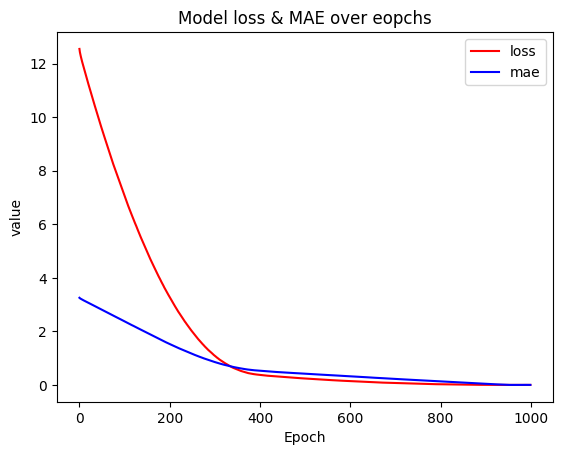

In [31]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over eopchs')
plt.show()

In [33]:
# 7 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 22ms/step


array([[-0.00039724],
       [ 0.00959702]], dtype=float32)

In [34]:
model.save('model/after_learning.h5')

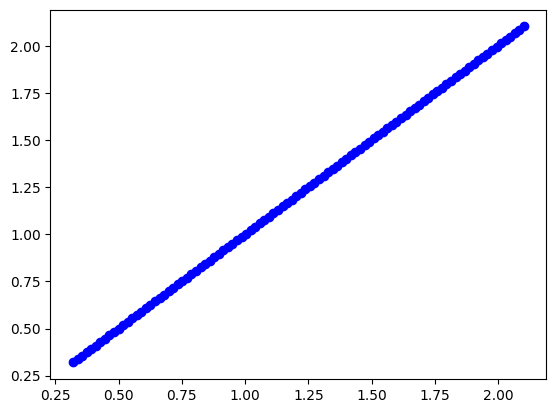

In [37]:
# 실제값
plt.scatter(x=scaled_data_c,
           y=scaled_data_f,
           c='b')
plt.show()

In [41]:
# 예측
y_hat = model.predict([scaled_data_c])
for h, y in zip(y_hat, scaled_data_f):
    print(h, y, h[0]-y)

4/4 [==============================] - 0s 2ms/step
[0.31941888] 0.32 -0.0005811226367950506
[0.33740854] 0.33799999999999997 -0.0005914573669433265
[0.3553982] 0.35600000000000004 -0.0006017920970917134
[0.37338787] 0.374 -0.0006121268272399893
[0.39137748] 0.392 -0.0006225211620330962
[0.40936714] 0.41 -0.0006328558921813721
[0.4273568] 0.428 -0.0006431906223297035
[0.44534647] 0.446 -0.0006535253524780349
[0.4633361] 0.46399999999999997 -0.0006638898849486985
[0.48132578] 0.48200000000000004 -0.0006742246150970854
[0.49931544] 0.5 -0.0006845593452453613
[0.5173051] 0.518 -0.0006949238777160804
[0.5352947] 0.536 -0.0007052884101867996
[0.5532844] 0.554 -0.0007155933380127433
[0.57127404] 0.5720000000000001 -0.0007259578704834624
[0.5892637] 0.59 -0.0007363224029540705
[0.6072533] 0.608 -0.0007466869354247896
[0.625243] 0.626 -0.0007569918632507333
[0.64323264] 0.644 -0.0007673563957214524
[0.66122234] 0.662 -0.0007776613235473961
[0.679212] 0.68 -0.0007880258560181153
[0.69720167] 0.6

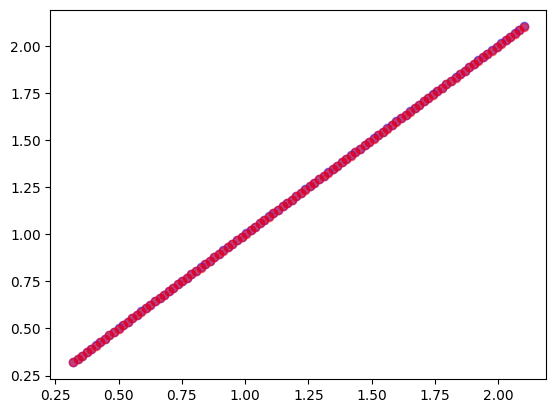

In [44]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='b', alpha=0.5)
plt.scatter(x=scaled_data_c, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습/


In [49]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100)   # 평균0, 표준편차 0.1 100개 데이터
noised_scaled_data_f = scaled_data_f + noise

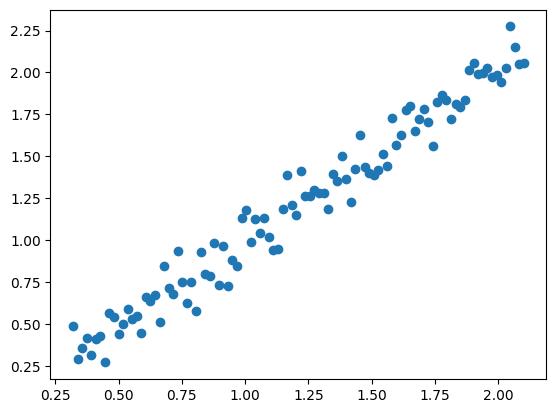

In [51]:
plt.scatter(x=scaled_data_c, y=noised_scaled_data_f)
plt.show()

In [55]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [56]:
# 5. 모델학슴
hist2 = model2.fit(scaled_data_c, noised_scaled_data_f, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.5791 - mae: 2.6859
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.4776 - mae: 2.6687
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.4130 - mae: 2.6577
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.3519 - mae: 2.6471
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.2983 - mae: 2.6379
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.2410 - mae: 2.6282
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.1860 - mae: 2.6186
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.1360 - mae: 2.6099
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.0849 - mae: 2.6010
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.0325 - mae: 2.5919
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 4.6611 - mae: 1.9187
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.6246 - mae: 1.9101
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5892 - mae: 1.9019
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5481 - mae: 1.8922
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5117 - mae: 1.8836
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.4774 - mae: 1.8754
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.4433 - mae: 1.8674
Epoch 95/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.4030 - mae: 1.8577
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.3666 - mae: 1.8489
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.3338 - mae: 1.8410
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 4

4/4 [==============================] - 0s 2ms/step - loss: 2.0634 - mae: 1.1980
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0382 - mae: 1.1897
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0162 - mae: 1.1823
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9966 - mae: 1.1759
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9725 - mae: 1.1678
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9507 - mae: 1.1604
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9292 - mae: 1.1534
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9059 - mae: 1.1453
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8868 - mae: 1.1389
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8625 - mae: 1.1306
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.6400 - mae: 0.6590
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6302 - mae: 0.6544
Epoch 262/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6216 - mae: 0.6506
Epoch 263/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6122 - mae: 0.6463
Epoch 264/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6018 - mae: 0.6415
Epoch 265/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5938 - mae: 0.6376
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5827 - mae: 0.6319
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5735 - mae: 0.6275
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5653 - mae: 0.6237
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5556 - mae: 0.6190
Epoch 270/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.2564 - mae: 0.4341
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2552 - mae: 0.4330
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2538 - mae: 0.4316
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2528 - mae: 0.4306
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2514 - mae: 0.4294
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - mae: 0.4284
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487 - mae: 0.4270
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2475 - mae: 0.4260
Epoch 354/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2464 - mae: 0.4250
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2455 - mae: 0.4241
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1650 - mae: 0.3447
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1641 - mae: 0.3438
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1633 - mae: 0.3431
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1628 - mae: 0.3421
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1622 - mae: 0.3416
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1615 - mae: 0.3408
Epoch 438/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1609 - mae: 0.3402
Epoch 439/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1602 - mae: 0.3395
Epoch 440/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1591 - mae: 0.3384
Epoch 441/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3372
Epoch 442/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1005 - mae: 0.2672
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0999 - mae: 0.2665
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0992 - mae: 0.2655
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0985 - mae: 0.2647
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0977 - mae: 0.2636
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0970 - mae: 0.2627
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0964 - mae: 0.2618
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0957 - mae: 0.2610
Epoch 526/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0952 - mae: 0.2601
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0945 - mae: 0.2590
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0538 - mae: 0.1944
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0534 - mae: 0.1938
Epoch 606/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0530 - mae: 0.1932
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0526 - mae: 0.1922
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0522 - mae: 0.1914
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0519 - mae: 0.1907
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0515 - mae: 0.1900
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0510 - mae: 0.1891
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0506 - mae: 0.1882
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0500 - mae: 0.1872
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0250 - mae: 0.1301
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1296
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1290
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1285
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0243 - mae: 0.1282
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.1276
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.1269
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1263
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.1258
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0233 - mae: 0.1252
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0925
Epoch 777/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0924
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0921
Epoch 779/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0920
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0918
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0913
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0911
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0908
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0904
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0901
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0810
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0810
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0811
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0812
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0806
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0807
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0806
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0806
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0806
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0802
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0802
Epoch 950/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0809
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0807
Epoch 954/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0810
Epoch 955/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0808
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0812
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0813
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step

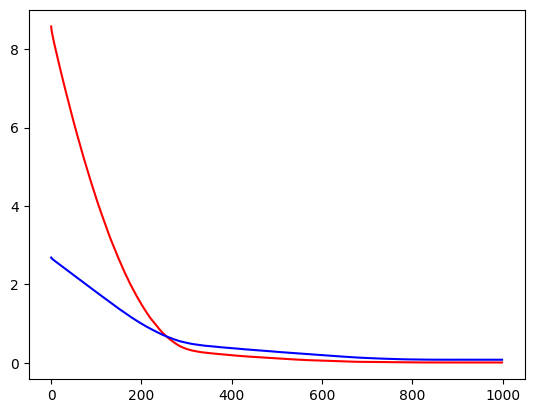

In [57]:
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [58]:
model.save('model/noise_after_learning.h5')

In [59]:
# 예측값
y_hat = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [60]:
for h,y in zip(y_hat, noised_scaled_data_f):
    print(y, h, h[0]-y)

0.48905257038003563 [0.30631626] -0.1827363138569033
0.2914062629459167 [0.32453412] 0.033127855229589886
0.3592820163678585 [0.34275192] -0.01653009614462242
0.4147516282996508 [0.36096978] -0.053781846424040436
0.31310769713742614 [0.37918758] 0.0660798867859137
0.4102065572905948 [0.39740545] -0.012801111714880686
0.42791096141420687 [0.41562325] -0.012287713790763266
0.2705275693654579 [0.4338411] 0.16331353991035996
0.5657658005663493 [0.4520589] -0.11370688924280192
0.542049851591955 [0.4702767] -0.0717731382206781
0.43745710260332404 [0.48849458] 0.05103747242032708
0.5008451738804279 [0.50671244] 0.005867262795597461
0.5865299374196752 [0.52493024] -0.0615996986959203
0.5278643584808353 [0.5431481] 0.015283741895293801
0.5477250921327455 [0.5613659] 0.013640810291113192
0.44467585875092086 [0.5795837] 0.13490784572066727
0.6634580311891888 [0.5978015] -0.06565652466987115
0.6383880905287038 [0.61601937] -0.022368722357011928
0.6714459923759963 [0.6342372] -0.03720882215657495
0

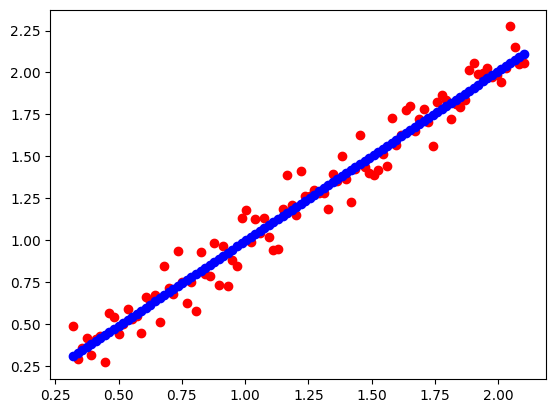

In [61]:
plt.scatter(x=scaled_data_c,
           y=noised_scaled_data_f,
           c='r')
plt.scatter(x=scaled_data_c,
           y=y_hat,
           c='b')